In [3]:
###2019.10.06 목표 선형모델까지###

#overfiting : 모델이 훈련세트에 너무 정확해서 테스트세트에는 일반화가 어렵다
#undeorfiting : 모델이 훈련세트에 다양성을 잡아내지 못하고 테스트세트에 막 해도 일반화가 된다.

C:\Users\alfot\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:  (26, 2)


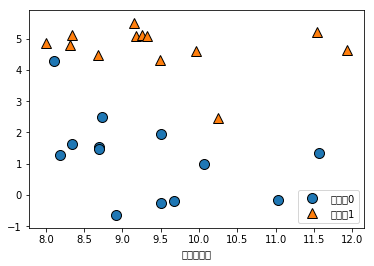

In [4]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
#데이터 셋 만들기
X, y = mglearn.datasets.make_forge()

#산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스0","클래스1"])
plt.xlabel("첫번째특성")
plt.xlabel("두번째특성")
print("X.shape: ",X.shape)

Text(0.5, 0, '타깃')

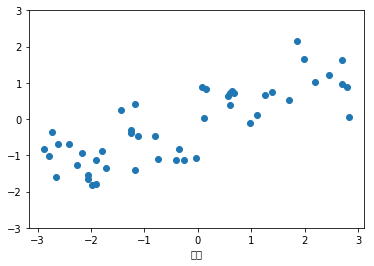

In [5]:
#데이터 셋 만들기
X, y = mglearn.datasets.make_wave(n_samples=48)

#그래프 그리기
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.xlabel("타깃")

In [6]:
# 유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

#데이터 알아보기
print("유방암 데이터의 형태", cancer.data.shape)
print("클래스 별 샘플 수: \n",{n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})
print("특성 이름: \n", cancer.feature_names)

cancer.keys():
 dict_keys(['feature_names', 'filename', 'data', 'target', 'target_names', 'DESCR'])
유방암 데이터의 형태 (569, 30)
클래스 별 샘플 수: 
 {'malignant': 212, 'benign': 357}
특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
#보스턴 주택가격 데이터 불러오기
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys():\n", boston.keys())

#데이터 알아보기
print("보스턴 데이터의 형태", boston.data.shape)
#유도된 데이터(특성끼리 곱하는 등 특성을 더 많이 만든 데이터) 알아보기
X,y = mglearn.datasets.load_extended_boston()
print("x.shape",X.shape)

boston.keys():
 dict_keys(['feature_names', 'filename', 'data', 'target', 'DESCR'])
보스턴 데이터의 형태 (506, 13)
x.shape (506, 104)


C:\Users\alfot\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


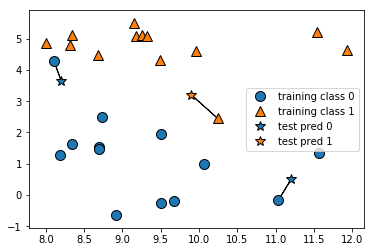

In [8]:
##K 최근접 이론 : 가장 가까운 거리순으로 포함시킴
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [9]:
#훈련 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# 모델을 임포트하고 객체로 만들기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#학습시키기
clf.fit(X_train,y_train)

#테스트 세트 하나 예측해보기
print("테스트 예측", clf.predict(X_test))

#테스트 정확도
print("테스트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 예측 [1 0 1 0 1 0 0]
테스트 정확도: 0.86


C:\Users\alfot\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


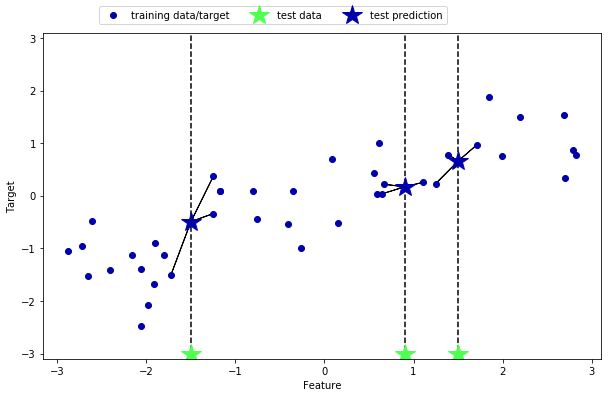

In [10]:
##K 최근접 회귀
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [11]:
#데이터 로드
from sklearn.neighbors import KNeighborsRegressor
X, y =mglearn.datasets.make_wave(n_samples=40)
#훈련 테스트 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
#모델 객체 생성
reg=KNeighborsRegressor(n_neighbors=3)
#모델 학습시키기
reg.fit(X_train,y_train)
#예측하기
print("테스트 세트 예측", reg.predict(X_test))
#정확도 예측
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

##장점
#성능 굿 : 다른거 하기 전에 시도하기 좋음
##단점
#훈련 데이터가 크면 오래 걸림, 전처리 중요

테스트 세트 예측 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


In [12]:
##선형모델은 열심히 했으니까 지나갈게##
#1. 선형회귀(최소제곱법)
#2. 1번이 overfit 경우==W를 0이 되게) 리지 회귀(L2) : 최소제곱에 끝에 a*sigma(w) 추가 -> a 클수록 선형회귀와 비슷/ a 작을수록 일반화 굳 
#3. 2번과 비슷) 라소 회귀(L1) : 리지와 원리는 동일 but W를 아얘 없앰 -> a 클수록 일반화 굳/ a 작을 수록 선형회귀와 비슷

#4. 분류용 선형 모델 : = 이 > 로 바뀔 뿐 (ex. logistic reg, SVM) : 기본적으로 L2이용 a대신에 C -> C 높이면 선형분류/ C 낮추면 일반화 굳
#5. 다중클래스 분류용 선형 모델 : 나 아니면 남 방식

##장점
#속도 빠름, 데이터 커도 잘 처리됨
#이해가 쉬움

In [13]:
##나이즈 베이즈 분류기
#선형 분류기와 비슷하지만 훈련 속도가 좀 더 빠르고 일반화 성능은 좀 뒤짐
#종류 
#1. 가우시안NB : 연속적인 데이터 -> 클래스가 동일한 것들의 표준편차와 평균
#2. 베르누이NB : 이진 데이터 -> 클래스가 동일한 것들의 특성 마다의 합
#3. 멀티노미얼NB : 카운트 데이터(특성이 어떤 것을 헤아림 ex 문장에 단어가 나타난 수) -> 클래스가 동일한 것들의 특성의 평균
#예측
#데이터 포인트의 클래스를 통계값과 비교하여 가장 잘 맞는 클래스로 분류

In [14]:
#매개변수 a : 특성에 양의 데이터 포인터를 a개 만큼 더해줌 = 데이터를 완만하게 함(정확도에 큰 영향 X)
#장점
#속도가 빠르고 과정 이해가 쉬움 고차원 데이터에도 작동함 매개변수에 민감하지 않음

In [28]:
import numpy as np
#베르누이 NB 분류기
X = np.array([[0,1,0,1],[1,0,1,0],[0,0,0,1],[1,0,1,0]])
y = np.array([0,1,0,1]) #class 0에 해당하는 1,3번 데이터 포인트의 값 더하기 , clas 1에 해당하는 2,4번 데이터 포인트의 값 더하기

count = {}
for label in np.unique(y):
    #각 클래스에 대해 반복/특성마다 1이 나타나는 수를 셈
    count[label] = X[y==label].sum(axis=0)
print("특성 카운트 : \n",count)

특성 카운트 : 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 0])}


In [32]:
##결정 트리
#like 스무고개, 클래스 2일 때, 가장 잘 둘로 쪼개는 특성 값을 찾아서 선긋기 -> 반복
#overfit 방지 : 사전 가지치기(트리 생성을 일찍 중단) or 사후 가지치기(데이터가 적은 노드 삭제)
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [33]:
#결정트리 시각화하기 위해 데이터를 txt같은 dot으로 저장
from sklearn.tree import export_graphviz
from IPython.display import display
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
#graphviz를 이용하여 시각화하기
import graphviz
with open("tree.dot") as f: #############encoding='UTF-8'넣으면 된다는데 안된다.
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 144: illegal multibyte sequence

Feature importances: [0. 1.]


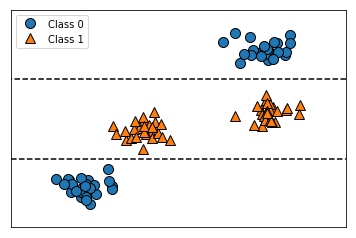

In [37]:
tree = mglearn.plots.plot_tree_not_monotone()
#display(tree)  ##############display가 안됨

#특성 중요도 : 트리를 나누는 잣대로 쓰인 특성일 수록 1에 가까운 값을 가짐. but 값이 낮다고 특성이 안 중요한 건 아님. 안쓰였을 뿐

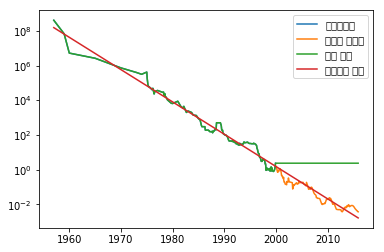

In [46]:
##결정 트리 회귀
#결정 트리를 이용한 회귀에는 "외샵"이 존재 : train 데이터 밖의 데이터는 예측을 못함
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#2000년 이전은 훈련, 2000년 이후는 테스트
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]
#가격을 예측하기 위해 날짜 특성만 이용
X_train = data_train.date[:,np.newaxis]
#데이터와 타겟 관계를 선형으로<-로그 스케일
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

#전체 기간에 대해 수행
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#로그 스케일을 다시 되돌림
price_tree=np.exp(pred_tree)
price_lr =np.exp(pred_lr)

plt.semilogy(data_train.date,data_train.price,label="훈련데이터")
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#빨간 선형회귀는 test도 잘 예측함
#초록 트리예측은 못함

#사전 가지치기가 중요 매개 변수
#장점
#시각화 잘됨, 데이터 스케일에 구애 받지 않음
#정규화 표준화 필요없음
#단점
#overfit잘 일어남